In [2]:
pip install pandas_datareader


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
     ---------------------------------------- 3.9/3.9 MB 2.2 MB/s eta 0:00:00


In [22]:
!pip install yfinance

     -------------------------------------- 59.2/59.2 kB 142.7 kB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 1.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from pandas_datareader import data as web
import datetime    
from datetime import date
import yfinance as yfin
yfin.pdr_override()

In [33]:
tesla = web.get_data_yahoo("TSLA", start="2021-01-01", end="2021-04-17")
ford = web.get_data_yahoo("F", start="2021-01-01", end="2021-04-17")
gm = web.get_data_yahoo("GM", start="2021-01-01", end="2021-04-17")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# STOCK VISUALISATION

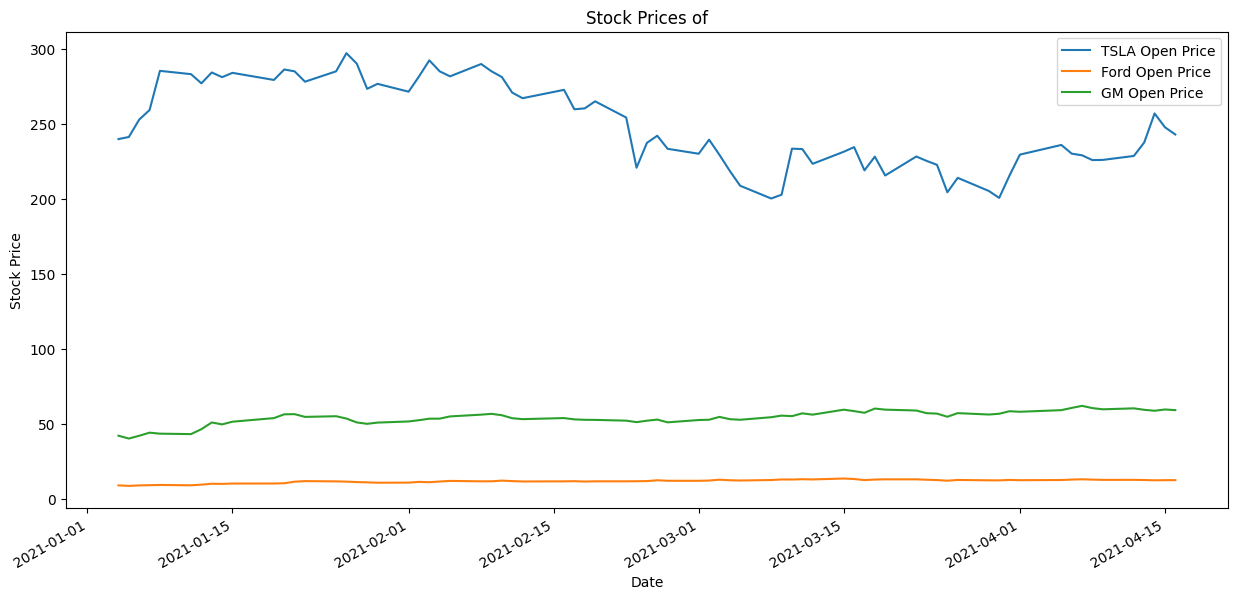

In [34]:
import matplotlib.pyplot as plt
tesla['Open'].plot(label = "TSLA Open Price",figsize=(15,7))
ford['Open'].plot(label = "Ford Open Price")
gm['Open'].plot(label = "GM Open Price")
plt.legend()

plt.ylabel('Stock Price')
plt.title("Stock Prices of")
plt.show()

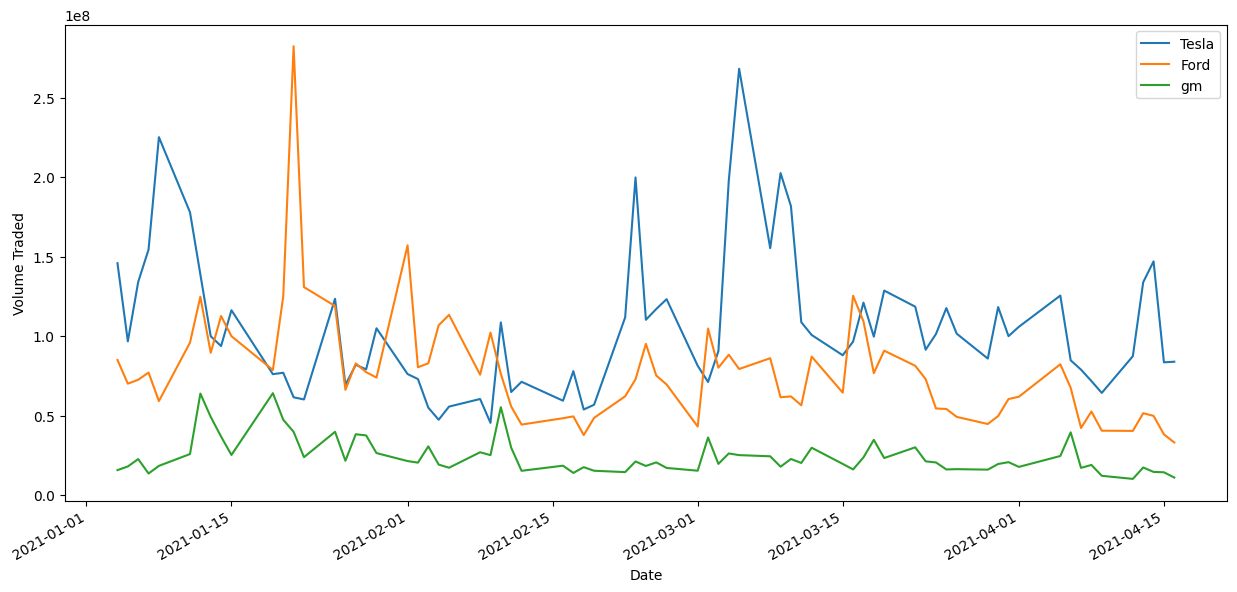

In [36]:
#Volume-Traded Visualisation

tesla['Volume'].plot(label="Tesla",figsize=(15,7))
ford['Volume'].plot(label="Ford",figsize=(15,7))
gm['Volume'].plot(label="gm",figsize=(15,7))

plt.ylabel("Volume Traded")
plt.legend()  

# Visualisation of the total traded price

In [41]:
tesla["Total Traded"] = tesla["Open"] * tesla['Volume']
ford["Total Traded"] = ford["Open"] * ford['Volume']
gm["Total Traded"] = gm["Open"] * gm['Volume']

In [42]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,3.499324e+10
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,2.333456e+10
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,3.390450e+10
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,4.004709e+10
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,6.424751e+10


In [43]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2021-01-04,8.81,8.84,8.43,8.52,7.722802,85043100,7.492297e+08
2021-01-05,8.47,8.72,8.46,8.65,7.840637,70127800,5.939825e+08
2021-01-06,8.79,8.94,8.68,8.84,8.012858,72590200,6.380679e+08
2021-01-07,8.94,9.08,8.88,9.06,8.212275,77117100,6.894268e+08
2021-01-08,9.10,9.14,8.89,9.00,8.157889,59162200,5.383760e+08


In [44]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2021-01-04,41.950001,42.119999,40.139999,40.509998,40.234299,15768100,6.614718e+08
2021-01-05,40.060001,41.840000,40.040001,41.660000,41.376469,18045800,7.229148e+08
2021-01-06,41.919998,43.849998,41.860001,42.980000,42.687489,22694900,9.513702e+08
2021-01-07,43.980000,43.980000,42.959999,43.320000,43.025173,13625700,5.992583e+08
2021-01-08,43.310001,43.490002,42.320000,43.060001,42.766945,18426200,7.980387e+08


Text(0, 0.5, 'Total Traded')

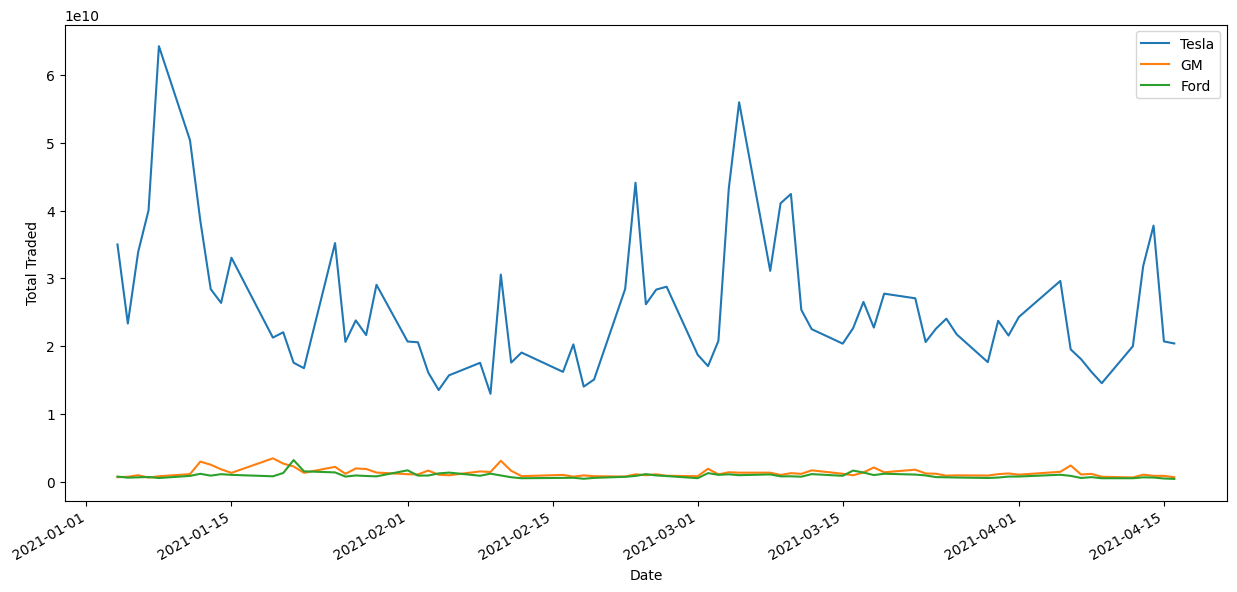

In [45]:
tesla['Total Traded'].plot(label="Tesla", figsize=(15,7))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label="Ford")
plt.legend()
plt.ylabel('Total Traded')

In [46]:
tesla['Total Traded'].argmax()

4

In [48]:
tesla.iloc[[tesla['Total Traded'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,6.424751e+10


<AxesSubplot: xlabel='Date'>

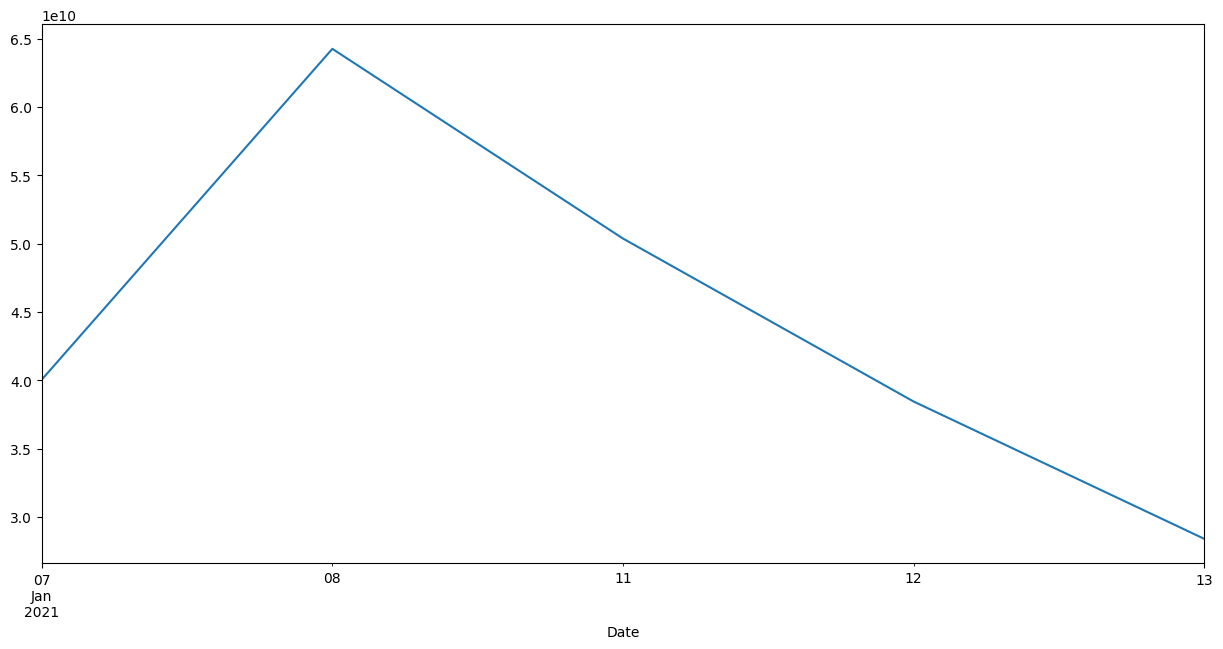

In [51]:
tesla['Total Traded'].iloc[3:8].plot(figsize=(15,7))

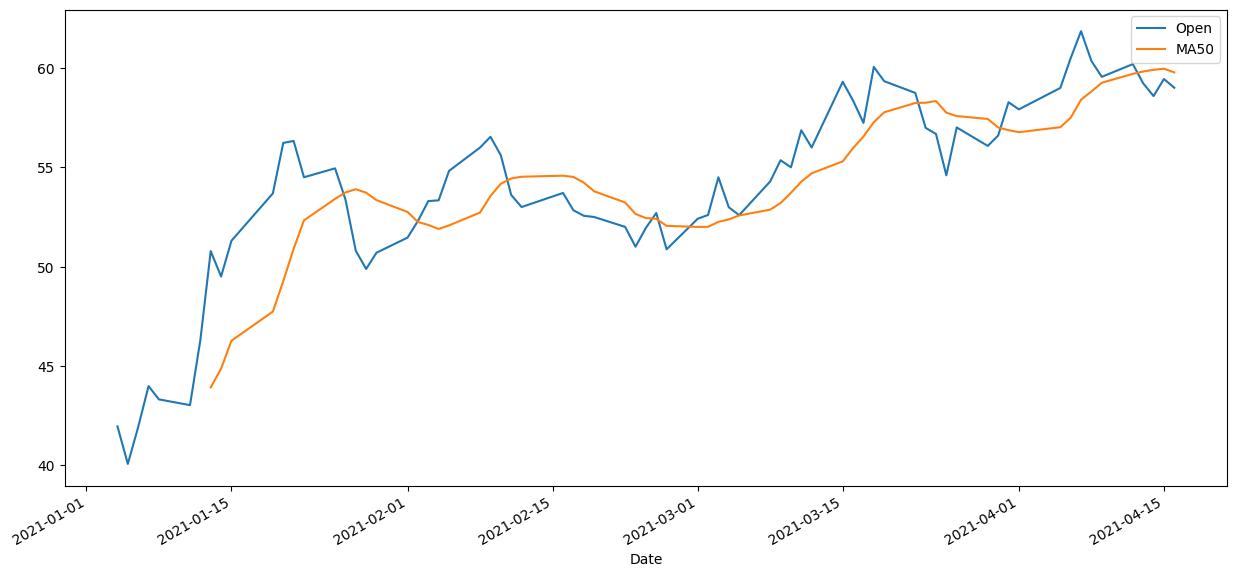

In [75]:
#Taking the moving average for gm opening prices to determine treands in the market
gm['Open'].plot(figsize=(15,7))
gm['MA10'] = gm['Open'].rolling(10).mean()
gm['MA10'].plot(label='MA10',figsize=(15,7))
plt.legend()

<AxesSubplot: xlabel='Date'>

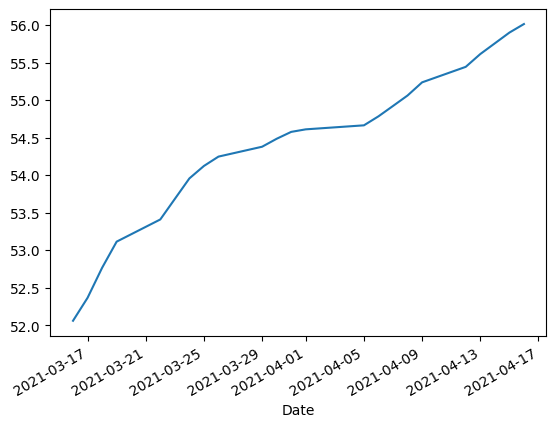

In [76]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA50'].plot(label='MA50')

# GRAPHICAL ANALYSIS AND VISUALISATION 

# CORRELATION BRTWEEN STOCKS AND SCATTER MATRIX

In [78]:
from pandas.plotting import scatter_matrix
import pandas as pd

In [79]:
 car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']], axis = 1)
 car_comp.columns = ['Tesla Open','GM Open','Ford Open']

array([[<AxesSubplot: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot: xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot: xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

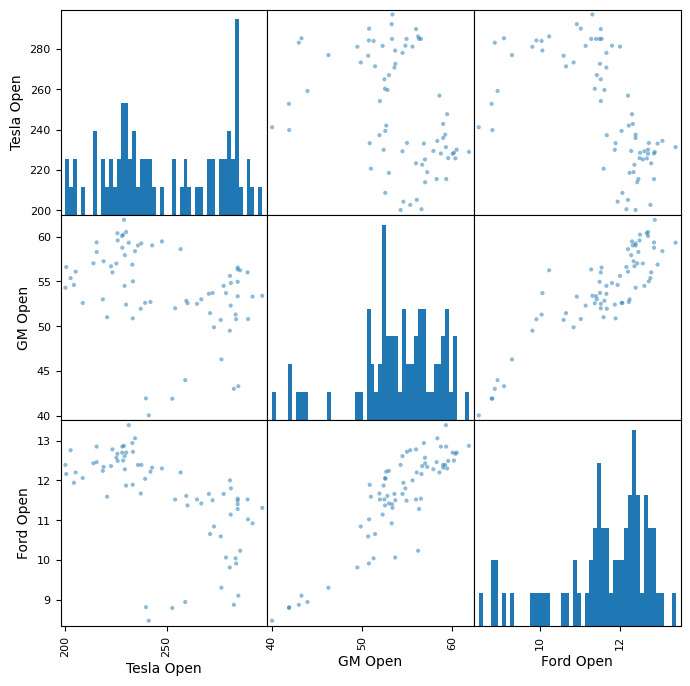

In [80]:
scatter_matrix(car_comp,figsize = (8,8),hist_kwds={'bins':50})

# Candlestick Charts

In [88]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


([<matplotlib.lines.Line2D at 0x2428d3c5a30>,
  <matplotlib.patches.Rectangle at 0x2428d538c70>])

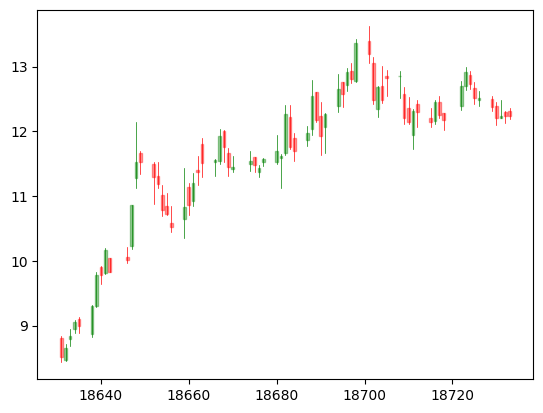

In [109]:
import pandas as pd
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

ford_reset = ford.loc['2021-01' : '2021-04'].reset_index()

ford_reset = ford_reset.loc[:,['Date','Open','High','Low','Close']]
ford_reset['Date'] = pd.to_datetime(ford_reset['Date'])
ford_reset['Date'] = ford_reset['Date'].apply(mpl_dates.date2num)
ford_reset = ford_reset.astype(float)

#ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date : date2num(date))
#ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']]]



#modays = WeekdayLocator(MONDAY)
#alldays = DayLocator()
#weekFormatter = DateFormatter(" %b %d ")
#dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots()
candlestick_ohlc(ax, ford_reset.values , width = 0.6, colorup = 'g', colordown='r', alpha = 0.4)

array([[1.8932e+04, 3.6000e+01, 4.2000e+01, 2.2000e+01, 2.9000e+01],
       [1.8933e+04, 5.6000e+01, 7.3000e+01, 1.1000e+01, 7.2000e+01],
       [1.8934e+04, 4.5000e+01, 6.1000e+01, 1.0000e+01, 1.1000e+01],
       [1.8935e+04, 2.9000e+01, 6.2000e+01, 2.0000e+00, 4.0000e+00],
       [1.8936e+04, 6.5000e+01, 7.3000e+01, 1.3000e+01, 2.3000e+01],
       [1.8937e+04, 6.6000e+01, 5.6000e+01, 2.4000e+01, 6.8000e+01],
       [1.8938e+04, 6.7000e+01, 5.5000e+01, 2.5000e+01, 4.5000e+01]])

# Daily Percentage Change

Calcucating the percent returns and then plotting them to analysise which stocks are the most stable ones to invest.

In [140]:
tesla['returns'] = ( (tesla['Close'])/(tesla['Close'].shift(1)) ) - 1

In [143]:
tesla = tesla.dropna()
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,2.333456e+10,0.007317
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,3.390450e+10,0.028390
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,4.004709e+10,0.079447
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,6.424751e+10,0.078403
2021-01-11,283.133331,284.809998,267.873322,270.396667,270.396667,177904800,5.037078e+10,-0.078214


In [134]:
ford['returns'] = (ford['Close']/ford['Close'].shift(1)) - 1
gm['returns']  = (gm['Close']/gm['Close'].shift(1)) - 1

In [144]:
ford = ford.dropna()
ford.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2021-01-05,8.47,8.72,8.46,8.65,7.840637,70127800,5.939825e+08,0.015258
2021-01-06,8.79,8.94,8.68,8.84,8.012858,72590200,6.380679e+08,0.021965
2021-01-07,8.94,9.08,8.88,9.06,8.212275,77117100,6.894268e+08,0.024887
2021-01-08,9.10,9.14,8.89,9.00,8.157889,59162200,5.383760e+08,-0.006623
2021-01-11,8.87,9.32,8.82,9.30,8.429818,95968300,8.512388e+08,0.033333


In [145]:
gm.dropna()
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA8,returns
Date,,,,,,,,,,
2021-01-04,41.950001,42.119999,40.139999,40.509998,40.234299,15768100,6.614718e+08,NaN,NaN,NaN
2021-01-05,40.060001,41.840000,40.040001,41.660000,41.376469,18045800,7.229148e+08,NaN,NaN,0.028388
2021-01-06,41.919998,43.849998,41.860001,42.980000,42.687489,22694900,9.513702e+08,NaN,NaN,0.031685
2021-01-07,43.980000,43.980000,42.959999,43.320000,43.025173,13625700,5.992583e+08,NaN,NaN,0.007911
2021-01-08,43.310001,43.490002,42.320000,43.060001,42.766945,18426200,7.980387e+08,NaN,NaN,-0.006002


<AxesSubplot: >

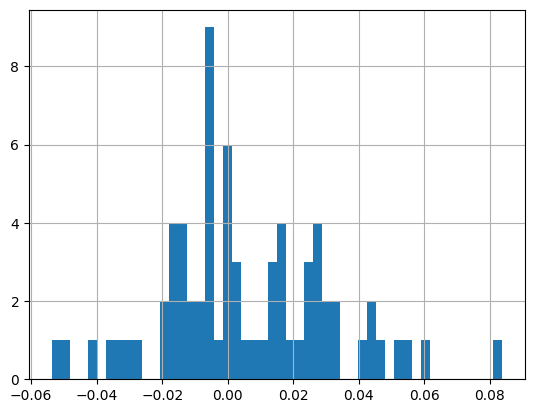

In [118]:
ford['returns'].hist(bins = 50)

The Wider the histogram is, the more volatile the stock of the company

<AxesSubplot: >

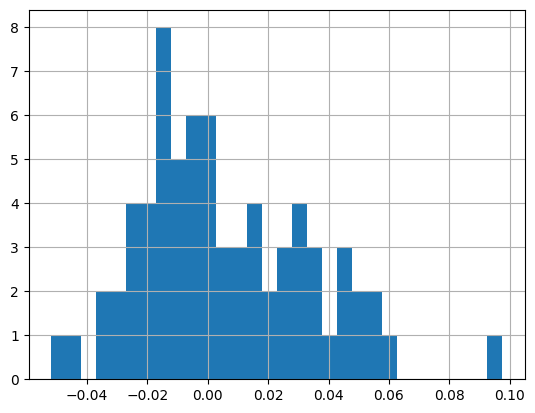

In [121]:
gm['returns'].hist(bins = 30)

The bell shape is related to the standard deviation of the distribution, the higher it is, the more the variance is, therfore more the volatility of the stock

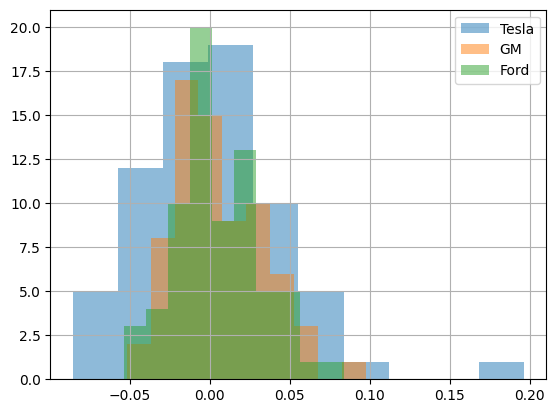

In [126]:
tesla['returns'].hist(label = 'Tesla', alpha = 0.5)
gm['returns'].hist(label = 'GM', alpha = 0.5)
ford['returns'].hist(label = 'Ford', alpha = 0.5)
plt.legend()

As we can see that Tesla stocks are more wider than the rest of two, which implies Tesla stocks are more volatile.

# KDE plots

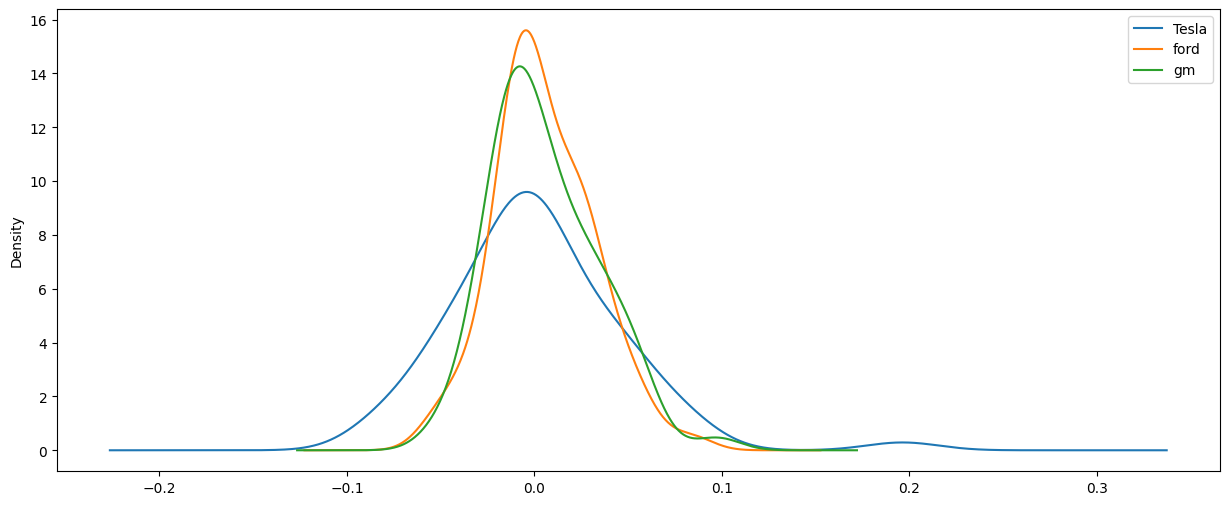

In [129]:
tesla['returns'].plot(kind='kde', label = 'Tesla', figsize = (15,6))
ford['returns'].plot(kind='kde', label = 'ford', figsize = (15,6))
gm['returns'].plot(kind='kde', label = 'gm', figsize = (15,6))
plt.legend()

# VISUALISATION USING BOX PLOTS

<AxesSubplot: >

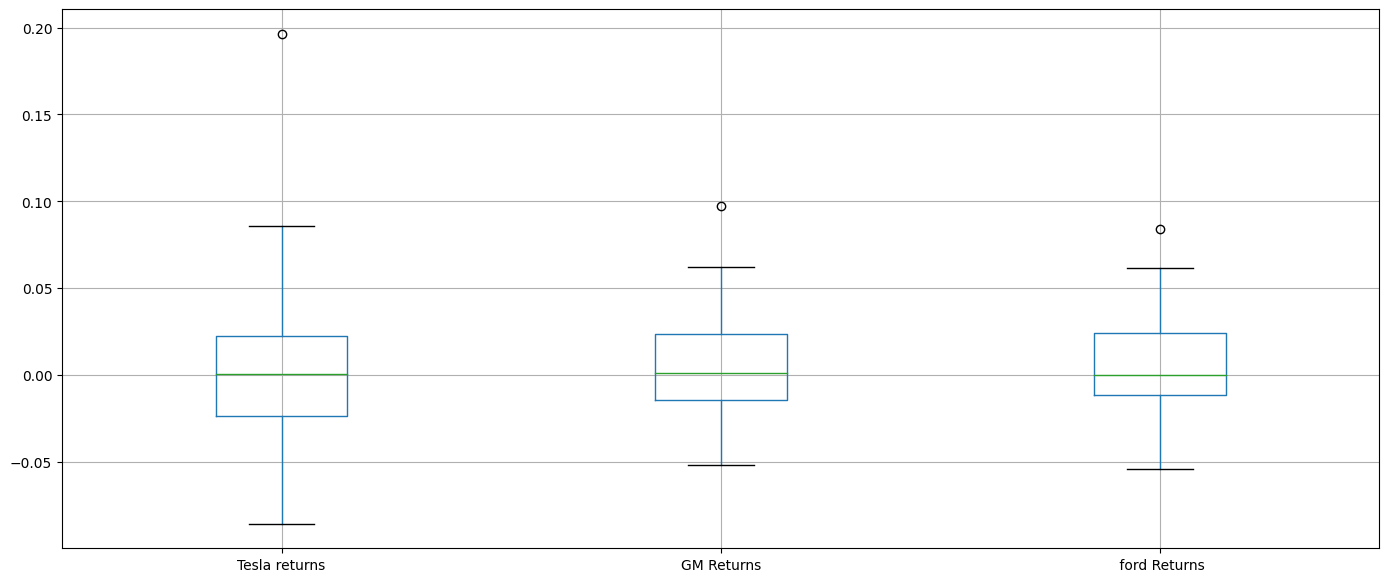

In [158]:
tesla['returns'] = tesla['returns'].astype(float)
ford['returns'] = ford['returns'].astype(float)
gm['returns'] = gm['returns'].astype(float)

box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']], axis = 1)
box_df.columns=["Tesla returns", "GM Returns", " ford Returns"]
box_df = box_df.dropna()

box_df.boxplot(figsize = (17,7))


# CORRELATION OF THE STOCKS IN TERMS OF VOLATILITY AND STABILITY

THE WAY TO DO THIS IS TO PASS THE CONCATENATED RETURNS TO THE SCATTER MATRIX

array([[<AxesSubplot: xlabel='Tesla returns', ylabel='Tesla returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel='Tesla returns'>,
        <AxesSubplot: xlabel=' ford Returns', ylabel='Tesla returns'>],
       [<AxesSubplot: xlabel='Tesla returns', ylabel='GM Returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel='GM Returns'>,
        <AxesSubplot: xlabel=' ford Returns', ylabel='GM Returns'>],
       [<AxesSubplot: xlabel='Tesla returns', ylabel=' ford Returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel=' ford Returns'>,
        <AxesSubplot: xlabel=' ford Returns', ylabel=' ford Returns'>]],
      dtype=object)

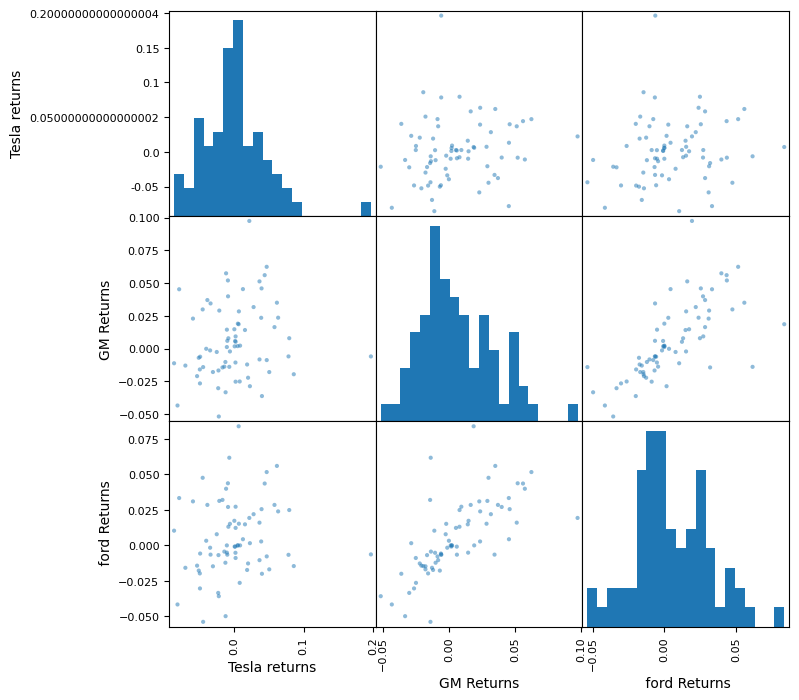

In [161]:
scatter_matrix(box_df, figsize = (8,8), hist_kwds = {'bins':20} , alpha = 0.5)

# CUMULATIVE RETURN

In [162]:
tesla['Cumulative Return'] = (1+ tesla['returns']).cumprod()


In [163]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,2.333456e+10,0.007317,1.007317
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,3.390450e+10,0.028390,1.035915
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,4.004709e+10,0.079447,1.118215
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,6.424751e+10,0.078403,1.205887
2021-01-11,283.133331,284.809998,267.873322,270.396667,270.396667,177904800,5.037078e+10,-0.078214,1.111569


In [168]:
ford['Cumulative Return'] = (1+ ford['returns']).cumprod()


In [169]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2021-01-05,8.47,8.72,8.46,8.65,7.840637,70127800,5.939825e+08,0.015258,1.015258
2021-01-06,8.79,8.94,8.68,8.84,8.012858,72590200,6.380679e+08,0.021965,1.037559
2021-01-07,8.94,9.08,8.88,9.06,8.212275,77117100,6.894268e+08,0.024887,1.063380
2021-01-08,9.10,9.14,8.89,9.00,8.157889,59162200,5.383760e+08,-0.006623,1.056338
2021-01-11,8.87,9.32,8.82,9.30,8.429818,95968300,8.512388e+08,0.033333,1.091549


In [170]:
gm['Cumulative Return'] = (1+ gm['returns']).cumprod()

gm.head()

<AxesSubplot: xlabel='Date'>

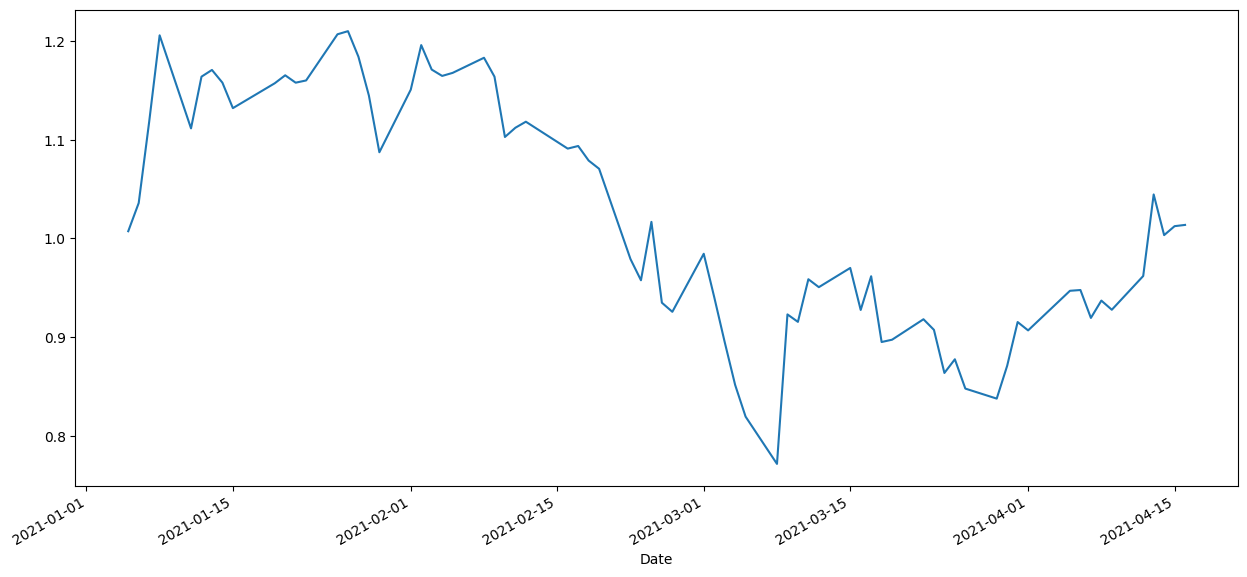

In [171]:
tesla['Cumulative Return'].plot(label='Tesla', figsize = (15,7))

<AxesSubplot: xlabel='Date'>

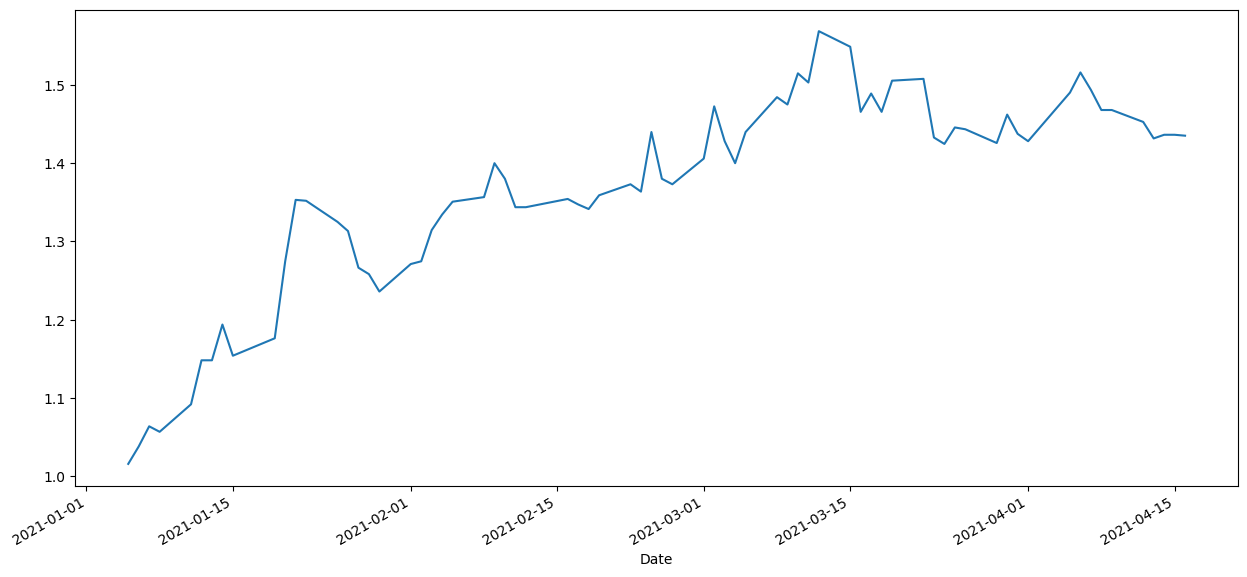

In [172]:
ford['Cumulative Return'].plot(label='ford', figsize = (15,7))

<AxesSubplot: xlabel='Date'>

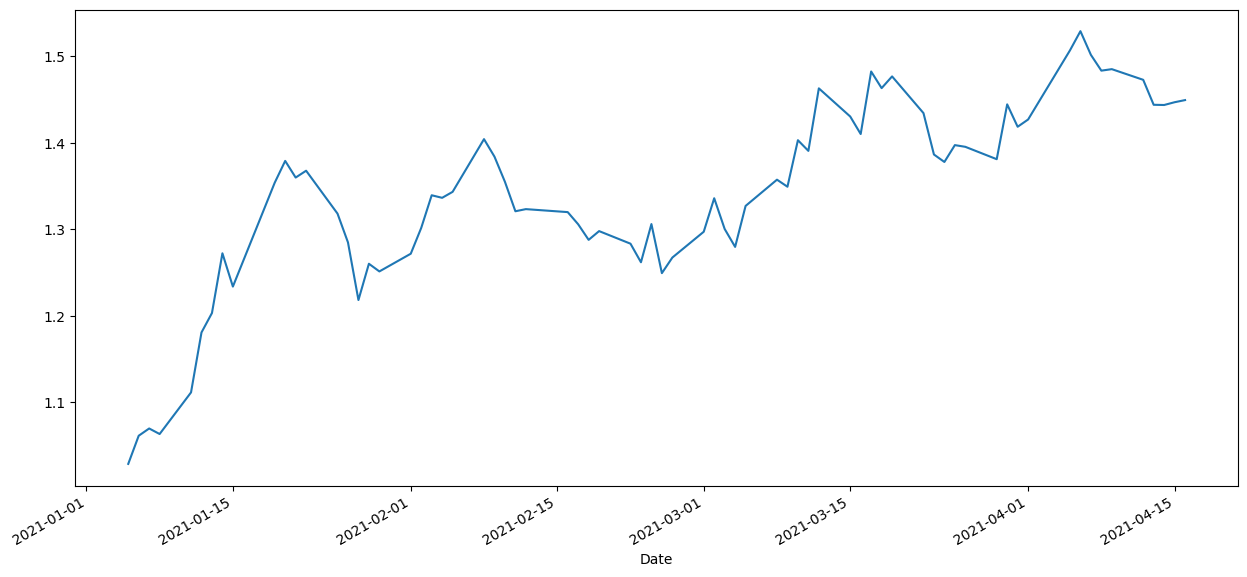

In [173]:
gm['Cumulative Return'].plot(label='gm', figsize = (15,7))

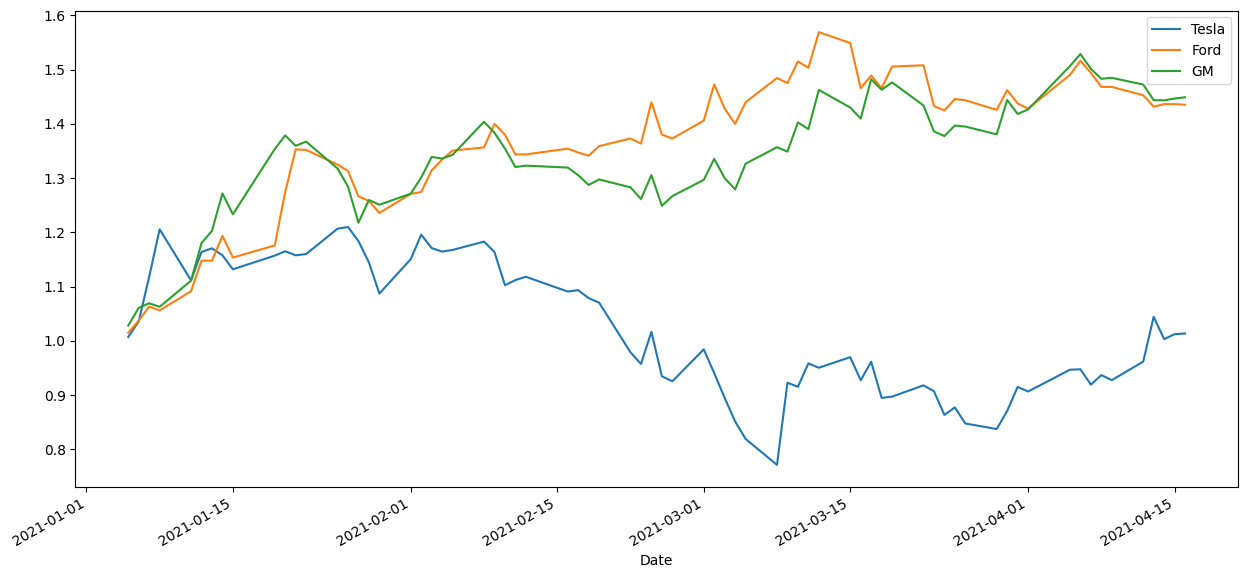

In [175]:
tesla['Cumulative Return'].plot(label='Tesla', figsize = (15,7))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

CUMULATIVE RETURN IS ALWAYS COMPARED TO ONE DOLLAR, WHICH ANSWERS THE MOST COMMON QUESTION WHICH STOCK SHOWS THE HIGHEST RETURN ON ONE DOLLAR INVESTED, IN THIS CASE THE ANSWER IS FORD FOR THIS TIME FRAME 